# Lateral inhibition

We create a striatal network, then place two spherical symmetric population units with radie ```r``` containing ```N_pop``` neurons each at a distance ```d``` from each other.

We stimulate the two populations first A, then B, then A and B together and investigate the firing frequency of the two populations.

In [1]:
import os
import numpy as np
network_path = "second_lateral"
snudda_data = "../../../../BasalGangliaData/data"

modified_network_file=os.path.join(network_path, "network-synapses-virtual.hdf5")
duration=5

In [2]:
from snudda import SnuddaInit

n_DSPN = 2000
n_ISPN = 2000
n_FS = 0
n_LTS = 0
n_ChIN = 0

si = SnuddaInit(network_path=network_path, snudda_data=snudda_data, random_seed=12345, honor_stay_inside=False)
si.define_striatum(num_dSPN=n_DSPN, num_iSPN=n_ISPN, num_FS=n_FS, num_LTS=n_LTS, num_ChIN=n_ChIN,
                   volume_type="cube")

# The centre of the cube is [0.00475, 0.004, 0.00775]. num_neurons is optional
si.add_population_unit_density(structure_name="Striatum", neuron_types=["dSPN", "iSPN"], 
                               unit_centre=np.array([0.00475, 0.004, 0.00775]) -np.array([0,50e-6,150e-6]),
                               probability_function="(d < 200e-6)*1", num_neurons=20)
si.add_population_unit_density(structure_name="Striatum", neuron_types=["dSPN", "iSPN"], 
                               unit_centre=np.array([0.00475, 0.004, 0.00775]) -np.array([150e-6,0,0]),
                               probability_function="(d < 200e-6) * 1", num_neurons=20)
 
si.write_json()

Using cube for striatum
Neurons for striatum read from /home/hjorth/HBP/BasalGangliaData/data/neurons/striatum
FS: Skipping neuron because, num_neurons =0
Adding neurons: dSPN from dir /home/hjorth/HBP/BasalGangliaData/data/neurons/striatum/dspn
Adding neurons: iSPN from dir /home/hjorth/HBP/BasalGangliaData/data/neurons/striatum/ispn
ChIN: Skipping neuron because, num_neurons =0
LTS: Skipping neuron because, num_neurons =0
No directory $SNUDDA_DATA/neurons/striatum/ngf, skipping NGF cells.
Writing second_lateral/network-config.json


In [3]:
from snudda import Snudda
sn = Snudda(network_path=network_path)
sn.place_neurons()

Placing neurons
Network path: second_lateral
Reading SNUDDA_DATA=/home/hjorth/HBP/BasalGangliaData/data from second_lateral/network-config.json
Generating 18630 points for second_lateral/mesh/Striatum-cube-mesh-0.0003676388257808005.obj
n_points = 17717, previous close_pairs = 37343
n_points = 16851, previous close_pairs = 30712
n_points = 16031, previous close_pairs = 25524
n_points = 15256, previous close_pairs = 21315
n_points = 14525, previous close_pairs = 17775
n_points = 13836, previous close_pairs = 14976
n_points = 13191, previous close_pairs = 12443
n_points = 12591, previous close_pairs = 10516
n_points = 12035, previous close_pairs = 8834
n_points = 11525, previous close_pairs = 7293
n_points = 11060, previous close_pairs = 6201
n_points = 10637, previous close_pairs = 5311
n_points = 10255, previous close_pairs = 4517
n_points = 9915, previous close_pairs = 3793
n_points = 9616, previous close_pairs = 3159
n_points = 9579, previous close_pairs = 2604
n_points = 7049, previ

Reading SNUDDA_DATA=/home/hjorth/HBP/BasalGangliaData/data from second_lateral/network-config.json
Population unit 0 has 3960 neurons
Population unit 1 has 20 neurons
Population unit 2 has 20 neurons
Population unit 0 has 3960 neurons
Population unit 1 has 20 neurons
Population unit 2 has 20 neurons


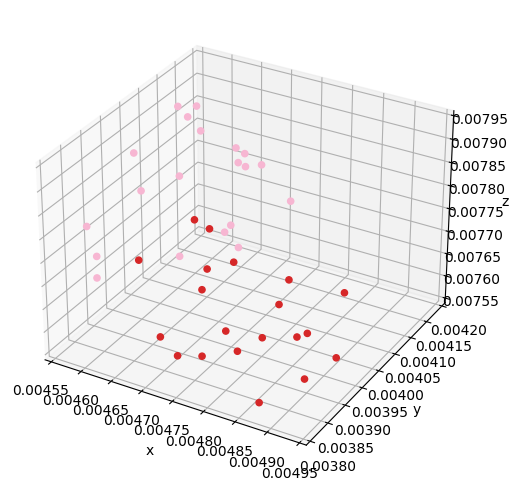

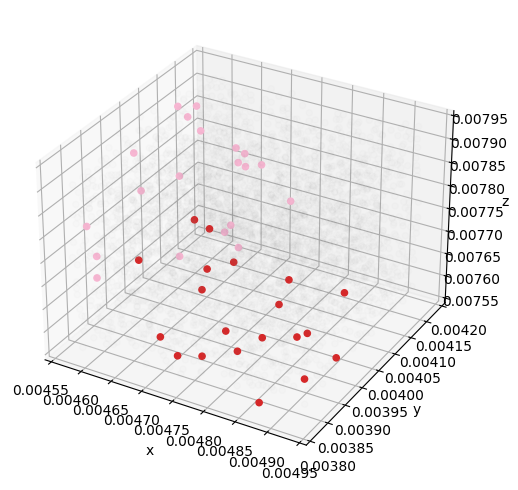

In [4]:
from snudda.plotting import PlotNetwork
pos_file = os.path.join(network_path, "network-neuron-positions.hdf5")

pn = PlotNetwork(pos_file)
pn.plot_populations(unmarked_alpha=0)
pn.plot_populations(unmarked_alpha=0.02)

# The commented code below also plots the network, but with the option to plot more detail of the neurons:
# pn = PlotNetwork(network_path)
# pn.plot(plot_axon=False, plot_dendrite=False, plot_synapses=False, colour_population_unit=True)

pn.close()  # Close the hdf5 file so others can use it (or better shut down kernel after)

In [5]:
os.system("../start_ipcluster.sh")

Sleeping 20 seconds to wait for workers to start


2024-02-28 12:07:03.041 [IPClusterStart] Starting ipcluster with [daemonize=False]
2024-02-28 12:07:03.291 [IPController] Hub listening on tcp://127.0.0.1:38497 for registration.
2024-02-28 12:07:03.292 [IPController] Hub using DB backend: DictDB
2024-02-28 12:07:03.549 [IPController] hub::created hub
2024-02-28 12:07:03.549 [IPController] writing connection info to /home/hjorth/HBP/Snudda/examples/notebooks/lateral_inhitibion/.ipython/profile_default/security/ipcontroller-client.json
2024-02-28 12:07:03.549 [IPController] writing connection info to /home/hjorth/HBP/Snudda/examples/notebooks/lateral_inhitibion/.ipython/profile_default/security/ipcontroller-engine.json
2024-02-28 12:07:03.550 [IPController] task::using Python leastload Task scheduler
2024-02-28 12:07:03.561 [task] Task scheduler started [leastload]
2024-02-28 12:07:03.561 [IPController] Heartmonitor beating every 3000ms
2024-02-28 12:07:03.561 [broadcast-0] BroadcastScheduler 0 started
2024-02-28 12:07:03.562 [broadcast

To stop ipcluster use:   ipcluster stop


0

In [6]:
sn.detect_synapses(parallel=True)

Touch detection
Network path: second_lateral
Reading IPYPARALLEL connection info from /home/hjorth/HBP/Snudda/examples/notebooks/lateral_inhitibion/.ipython/profile_default/security/ipcontroller-client.json

Reading SNUDDA_DATA=/home/hjorth/HBP/BasalGangliaData/data from second_lateral/network-config.json


2024-02-28 12:07:22.899 [IPController] client::client b'\x00k\x8bEk' requested 'connection_request'
2024-02-28 12:07:22.899 [IPController] client::client [b'\x00k\x8bEk'] connected
2024-02-28 12:07:23.062 [IPEngine] Handling apply_request: dfa47f46-e98f69695d823c9a11246ff6_277331_1
2024-02-28 12:07:23.061 [IPController] queue::client b'\x00\xf4\xb0\xdcQ' submitted request 'dfa47f46-e98f69695d823c9a11246ff6_277331_1' to 0
2024-02-28 12:07:23.062 [IPController] queue::client b'\x00\xf4\xb0\xdcQ' submitted request 'dfa47f46-e98f69695d823c9a11246ff6_277331_2' to 1
2024-02-28 12:07:23.062 [IPController] queue::client b'\x00\xf4\xb0\xdcQ' submitted request 'dfa47f46-e98f69695d823c9a11246ff6_277331_3' to 2
2024-02-28 12:07:23.063 [IPController] queue::client b'\x00\xf4\xb0\xdcQ' submitted request 'dfa47f46-e98f69695d823c9a11246ff6_277331_4' to 3
2024-02-28 12:07:23.063 [IPController] queue::client b'\x00\xf4\xb0\xdcQ' submitted request 'dfa47f46-e98f69695d823c9a11246ff6_277331_5' to 4
2024-02

importing SnuddaDetect from snudda.detect.detect on engine(s)


2024-02-28 12:07:24.600 [IPController] WARNING | unhandled iopub msg_type: 'comm_open'
2024-02-28 12:07:24.613 [IPController] queue::request 'dfa47f46-e98f69695d823c9a11246ff6_277331_1' completed on 0
2024-02-28 12:07:24.630 [IPController] WARNING | unhandled iopub msg_type: 'comm_open'
2024-02-28 12:07:24.636 [IPController] WARNING | unhandled iopub msg_type: 'comm_open'
2024-02-28 12:07:24.645 [IPController] queue::request 'dfa47f46-e98f69695d823c9a11246ff6_277331_2' completed on 1
2024-02-28 12:07:24.649 [IPController] queue::request 'dfa47f46-e98f69695d823c9a11246ff6_277331_6' completed on 5
2024-02-28 12:07:24.678 [IPController] WARNING | unhandled iopub msg_type: 'comm_open'
2024-02-28 12:07:24.694 [IPController] queue::request 'dfa47f46-e98f69695d823c9a11246ff6_277331_4' completed on 3
2024-02-28 12:07:24.694 [IPController] WARNING | unhandled iopub msg_type: 'comm_open'
2024-02-28 12:07:24.705 [IPController] queue::request 'dfa47f46-e98f69695d823c9a11246ff6_277331_7' completed 

importing ProjectionDetection from snudda.detect.projection_detection on engine(s)


2024-02-28 12:07:33.049 [IPEngine] Handling apply_request: dfa47f46-e98f69695d823c9a11246ff6_277331_194
2024-02-28 12:07:33.054 [IPEngine] Handling execute_request: dfa47f46-e98f69695d823c9a11246ff6_277331_202
2024-02-28 12:07:33.059 [IPEngine] Handling apply_request: dfa47f46-e98f69695d823c9a11246ff6_277331_210
2024-02-28 12:07:33.066 [IPEngine] Handling execute_request: dfa47f46-e98f69695d823c9a11246ff6_277331_218
2024-02-28 12:07:33.072 [IPEngine] Handling execute_request: dfa47f46-e98f69695d823c9a11246ff6_277331_226
2024-02-28 12:07:34.854 [IPClusterStart] Engines appear to have started successfully


Suppressing printouts for hyper voxels that complete in < 100 seconds.


2024-02-28 12:07:46.533 [IPEngine] Handling apply_request: dfa47f46-e98f69695d823c9a11246ff6_277331_233
2024-02-28 12:07:46.539 [IPEngine] Handling apply_request: dfa47f46-e98f69695d823c9a11246ff6_277331_234
2024-02-28 12:07:46.540 [IPEngine] Handling execute_request: dfa47f46-e98f69695d823c9a11246ff6_277331_235
2024-02-28 12:07:46.527 [IPController] queue::request 'dfa47f46-e98f69695d823c9a11246ff6_277331_232' completed on 7
2024-02-28 12:07:46.533 [IPController] queue::client b'\x00\xf4\xb0\xdcQ' submitted request 'dfa47f46-e98f69695d823c9a11246ff6_277331_233' to 7
2024-02-28 12:07:46.534 [IPController] queue::request 'dfa47f46-e98f69695d823c9a11246ff6_277331_233' completed on 7
2024-02-28 12:07:46.538 [IPController] queue::client b'\x00\xf4\xb0\xdcQ' submitted request 'dfa47f46-e98f69695d823c9a11246ff6_277331_234' to 7
2024-02-28 12:07:46.538 [IPController] queue::client b'\x00\xf4\xb0\xdcQ' submitted request 'dfa47f46-e98f69695d823c9a11246ff6_277331_235' to 7
2024-02-28 12:07:46.54

HyperID 86 completed - 20690063 synapses found (199.6 s)
Reading SNUDDA_DATA=/home/hjorth/HBP/BasalGangliaData/data from second_lateral/network-config.json


2024-02-28 12:10:52.677 [IPEngine] Handling apply_request: dfa47f46-e98f69695d823c9a11246ff6_277331_511
2024-02-28 12:10:52.682 [IPEngine] Handling apply_request: dfa47f46-e98f69695d823c9a11246ff6_277331_512
2024-02-28 12:10:52.673 [IPController] queue::request 'dfa47f46-e98f69695d823c9a11246ff6_277331_225' completed on 0
2024-02-28 12:10:52.676 [IPController] queue::client b'\x00\xf4\xb0\xdcQ' submitted request 'dfa47f46-e98f69695d823c9a11246ff6_277331_511' to 0
2024-02-28 12:10:52.679 [IPController] queue::request 'dfa47f46-e98f69695d823c9a11246ff6_277331_511' completed on 0
2024-02-28 12:10:52.682 [IPController] queue::client b'\x00\xf4\xb0\xdcQ' submitted request 'dfa47f46-e98f69695d823c9a11246ff6_277331_512' to 0
2024-02-28 12:10:52.684 [IPController] queue::request 'dfa47f46-e98f69695d823c9a11246ff6_277331_512' completed on 0
2024-02-28 12:10:53.040 [IPEngine] Handling execute_request: dfa47f46-e98f69695d823c9a11246ff6_277331_513
2024-02-28 12:10:53.040 [IPController] queue::clie

stop_parallel disabled, to keep pool running.

Execution time: 232.0s


2024-02-28 12:10:53.418 [IPController] queue::request 'dfa47f46-e98f69695d823c9a11246ff6_277331_517' completed on 4
2024-02-28 12:10:53.420 [IPController] queue::request 'dfa47f46-e98f69695d823c9a11246ff6_277331_518' completed on 5
2024-02-28 12:10:53.440 [IPController] queue::request 'dfa47f46-e98f69695d823c9a11246ff6_277331_519' completed on 6
2024-02-28 12:10:53.454 [IPController] queue::request 'dfa47f46-e98f69695d823c9a11246ff6_277331_520' completed on 7


(<snudda.detect.detect.SnuddaDetect at 0xffff2aabf2b0>,
 <snudda.detect.project.SnuddaProject at 0xfffed2bb0c70>)

In [7]:
sn.prune_synapses(parallel=True)

2024-02-28 12:10:53.500 [IPController] queue::request 'dfa47f46-e98f69695d823c9a11246ff6_277331_516' completed on 3
2024-02-28 12:10:53.502 [IPController] queue::request 'dfa47f46-e98f69695d823c9a11246ff6_277331_514' completed on 1
2024-02-28 12:10:53.522 [IPController] queue::request 'dfa47f46-e98f69695d823c9a11246ff6_277331_515' completed on 2
2024-02-28 12:10:53.541 [IPController] queue::request 'dfa47f46-e98f69695d823c9a11246ff6_277331_513' completed on 0
2024-02-28 12:10:53.552 [IPController] client::client b'\x00k\x8bEl' requested 'connection_request'
2024-02-28 12:10:53.552 [IPController] client::client [b'\x00k\x8bEl'] connected
2024-02-28 12:10:53.669 [IPController] queue::client b'\x00\xf4\xb0\xdcR' submitted request 'c5eb1401-1bb4fe28624f42d582e5f53c_277331_1' to 0
2024-02-28 12:10:53.669 [IPController] queue::client b'\x00\xf4\xb0\xdcR' submitted request 'c5eb1401-1bb4fe28624f42d582e5f53c_277331_2' to 1
2024-02-28 12:10:53.670 [IPController] queue::client b'\x00\xf4\xb0\xdc

Prune synapses
Network path: second_lateral
Reading IPYPARALLEL connection info from /home/hjorth/HBP/Snudda/examples/notebooks/lateral_inhitibion/.ipython/profile_default/security/ipcontroller-client.json

No file second_lateral/pruning_merge_info.json
importing SnuddaPrune from snudda.detect.prune on engine(s)


2024-02-28 12:10:53.670 [IPEngine] Handling apply_request: c5eb1401-1bb4fe28624f42d582e5f53c_277331_3
2024-02-28 12:10:53.683 [IPEngine] Handling apply_request: c5eb1401-1bb4fe28624f42d582e5f53c_277331_11
2024-02-28 12:10:53.670 [IPEngine] Handling apply_request: c5eb1401-1bb4fe28624f42d582e5f53c_277331_5
2024-02-28 12:10:53.682 [IPEngine] Handling apply_request: c5eb1401-1bb4fe28624f42d582e5f53c_277331_13
2024-02-28 12:10:53.695 [IPEngine] Handling apply_request: c5eb1401-1bb4fe28624f42d582e5f53c_277331_21
2024-02-28 12:10:53.672 [IPEngine] Handling apply_request: c5eb1401-1bb4fe28624f42d582e5f53c_277331_7
2024-02-28 12:10:53.684 [IPEngine] Handling apply_request: c5eb1401-1bb4fe28624f42d582e5f53c_277331_15
2024-02-28 12:10:53.694 [IPEngine] Handling apply_request: c5eb1401-1bb4fe28624f42d582e5f53c_277331_23
2024-02-28 12:10:53.703 [IPEngine] Handling execute_request: c5eb1401-1bb4fe28624f42d582e5f53c_277331_31
2024-02-28 12:10:53.670 [IPEngine] Handling apply_request: c5eb1401-1bb4fe

prune_synapses_parallel (2177640/41843042 synapses, 5.2% kept): 42.7s
prune_synapses_parallel (0/0 gap_junctions, 0.0% kept): 0.0s


2024-02-28 12:11:55.116 [IPEngine] Handling apply_request: c5eb1401-1bb4fe28624f42d582e5f53c_277331_128
2024-02-28 12:11:55.125 [IPEngine] Handling apply_request: c5eb1401-1bb4fe28624f42d582e5f53c_277331_136
2024-02-28 12:11:55.115 [IPEngine] Handling apply_request: c5eb1401-1bb4fe28624f42d582e5f53c_277331_125
2024-02-28 12:11:55.124 [IPEngine] Handling apply_request: c5eb1401-1bb4fe28624f42d582e5f53c_277331_133
2024-02-28 12:11:55.132 [IPEngine] Handling apply_request: c5eb1401-1bb4fe28624f42d582e5f53c_277331_141
2024-02-28 12:11:55.144 [IPEngine] Handling execute_request: c5eb1401-1bb4fe28624f42d582e5f53c_277331_149
2024-02-28 12:11:55.150 [IPEngine] Handling apply_request: c5eb1401-1bb4fe28624f42d582e5f53c_277331_157
2024-02-28 12:11:55.159 [IPEngine] Handling apply_request: c5eb1401-1bb4fe28624f42d582e5f53c_277331_165
2024-02-28 12:11:55.115 [IPEngine] Handling apply_request: c5eb1401-1bb4fe28624f42d582e5f53c_277331_121
2024-02-28 12:11:55.124 [IPEngine] Handling apply_request: c5e

stop_parallel disabled, to keep pool running.

Execution time: 293.9s


2024-02-28 12:11:55.301 [IPEngine] Handling execute_request: c5eb1401-1bb4fe28624f42d582e5f53c_277331_176
2024-02-28 12:11:55.301 [IPEngine] Handling execute_request: c5eb1401-1bb4fe28624f42d582e5f53c_277331_173
2024-02-28 12:11:55.306 [IPEngine] Handling execute_request: c5eb1401-1bb4fe28624f42d582e5f53c_277331_169
2024-02-28 12:11:55.301 [IPEngine] Handling execute_request: c5eb1401-1bb4fe28624f42d582e5f53c_277331_172
2024-02-28 12:11:55.301 [IPEngine] Handling execute_request: c5eb1401-1bb4fe28624f42d582e5f53c_277331_171
2024-02-28 12:11:55.301 [IPController] queue::client b'\x00\xf4\xb0\xdcR' submitted request 'c5eb1401-1bb4fe28624f42d582e5f53c_277331_169' to 0
2024-02-28 12:11:55.301 [IPController] queue::client b'\x00\xf4\xb0\xdcR' submitted request 'c5eb1401-1bb4fe28624f42d582e5f53c_277331_170' to 1
2024-02-28 12:11:55.301 [IPController] queue::client b'\x00\xf4\xb0\xdcR' submitted request 'c5eb1401-1bb4fe28624f42d582e5f53c_277331_171' to 2
2024-02-28 12:11:55.301 [IPController]

# Reduce network

Here we reduce the network by making the surrounding neurons virtual.

In [8]:
from snudda.utils.ablate_network import SnuddaAblateNetwork

ab = SnuddaAblateNetwork(network_file=network_path)
pop_unit_0 = ab.snudda_load.get_population_unit_members(population_unit=0)  # Here, surrounding neurons
pop_unit_1 = ab.snudda_load.get_population_unit_members(population_unit=1)
pop_unit_2 = ab.snudda_load.get_population_unit_members(population_unit=2)
# ab.only_keep_neuron_id(neuron_id=set(pop_unit_1).union(set(pop_unit_2)))
ab.make_virtual(pop_unit_0)
ab.write_network(out_file_name=modified_network_file)

2024-02-28 12:11:55.390 [IPEngine] WARNING | No heartbeat in the last 3500 ms (1 time(s) in a row).
2024-02-28 12:11:55.391 [IPController] queue::request 'c5eb1401-1bb4fe28624f42d582e5f53c_277331_175' completed on 6
2024-02-28 12:11:55.392 [IPController] queue::request 'c5eb1401-1bb4fe28624f42d582e5f53c_277331_171' completed on 2
2024-02-28 12:11:55.394 [IPController] queue::request 'c5eb1401-1bb4fe28624f42d582e5f53c_277331_173' completed on 4
2024-02-28 12:11:55.405 [IPController] queue::request 'c5eb1401-1bb4fe28624f42d582e5f53c_277331_169' completed on 0
2024-02-28 12:11:55.408 [IPController] queue::request 'c5eb1401-1bb4fe28624f42d582e5f53c_277331_176' completed on 7
2024-02-28 12:11:55.411 [IPController] queue::request 'c5eb1401-1bb4fe28624f42d582e5f53c_277331_172' completed on 3
2024-02-28 12:11:55.416 [IPController] queue::request 'c5eb1401-1bb4fe28624f42d582e5f53c_277331_170' completed on 1
2024-02-28 12:11:55.425 [IPController] queue::request 'c5eb1401-1bb4fe28624f42d582e5f53c

Writing to second_lateral/network-synapses-virtual.hdf5
Keeping 4000 neurons.
Making neuron id 0 (dSPN_0) virtual (old ID 0)
Making neuron id 1 (dSPN_0) virtual (old ID 1)
Making neuron id 2 (dSPN_1) virtual (old ID 2)
Making neuron id 3 (dSPN_1) virtual (old ID 3)
Making neuron id 4 (dSPN_1) virtual (old ID 4)
Making neuron id 5 (dSPN_1) virtual (old ID 5)
Making neuron id 6 (dSPN_2) virtual (old ID 6)
Making neuron id 7 (dSPN_2) virtual (old ID 7)
Making neuron id 8 (dSPN_2) virtual (old ID 8)
Making neuron id 9 (dSPN_3) virtual (old ID 9)
Making neuron id 10 (dSPN_3) virtual (old ID 10)
Making neuron id 11 (dSPN_3) virtual (old ID 11)
Making neuron id 12 (dSPN_3) virtual (old ID 12)
Making neuron id 13 (dSPN_3) virtual (old ID 13)
Making neuron id 14 (dSPN_3) virtual (old ID 14)
Making neuron id 15 (iSPN_0) virtual (old ID 15)
Making neuron id 16 (iSPN_1) virtual (old ID 16)
Making neuron id 17 (iSPN_1) virtual (old ID 17)
Making neuron id 18 (iSPN_1) virtual (old ID 18)
Making neur

In [9]:
pop_unit_0

array([   0,    1,    2, ..., 3997, 3998, 3999])

Reading SNUDDA_DATA=/home/hjorth/HBP/BasalGangliaData/data from second_lateral/network-config.json
Population unit 0 has 3960 neurons
Population unit 1 has 20 neurons
Population unit 2 has 20 neurons
Population unit 0 has 3960 neurons
Population unit 1 has 20 neurons
Population unit 2 has 20 neurons


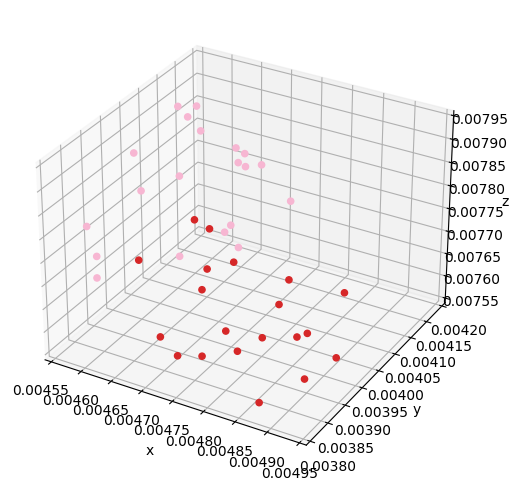

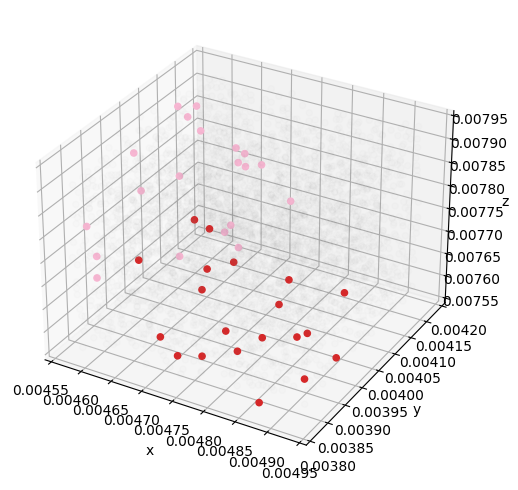

In [10]:
from snudda.plotting import PlotNetwork

pn2 = PlotNetwork(modified_network_file)
pn2.plot_populations(unmarked_alpha=0)
pn2.plot_populations(unmarked_alpha=0.02)

# The commented code below also plots the network, but with the option to plot more detail of the neurons:
# pn = PlotNetwork(network_path)
# pn.plot(plot_axon=False, plot_dendrite=False, plot_synapses=False, colour_population_unit=True)

pn2.close()  # Close the hdf5 file so others can use it (or better shut down kernel after)

In [11]:
from snudda.input.virtual_input import VirtualInput
vi = VirtualInput(spike_file="virtual_input_spikes.txt", mapping_file="virtual_input_mapping.txt")

for vidx in pop_unit_0:
    vi.add_input(neuron_id=vidx, spike_times = vi.poisson_spikes(frequency=5, max_time=duration))
    
vi.write_data()

In [12]:
sn.setup_input(network_file=modified_network_file, input_config="input-virtual.json", input_time=duration, parallel=True)

Setting up inputs, assuming input.json exists
Reading IPYPARALLEL connection info from /home/hjorth/HBP/Snudda/examples/notebooks/lateral_inhitibion/.ipython/profile_default/security/ipcontroller-client.json

Reading SNUDDA_DATA=/home/hjorth/HBP/BasalGangliaData/data from second_lateral/network-config.json
Writing input spikes to second_lateral/input-spikes.hdf5
Reading SNUDDA_DATA=/home/hjorth/HBP/BasalGangliaData/data from second_lateral/network-config.json


2024-02-28 12:12:01.668 [IPController] client::client b'\x00k\x8bEm' requested 'connection_request'
2024-02-28 12:12:01.668 [IPController] client::client [b'\x00k\x8bEm'] connected


importing SnuddaInput from snudda.input.input on engine(s)


2024-02-28 12:12:01.982 [IPController] queue::client b'\x00\xf4\xb0\xdcS' submitted request '935b8f21-9bab506906ec69797832f88f_277331_1' to 0
2024-02-28 12:12:01.983 [IPController] queue::client b'\x00\xf4\xb0\xdcS' submitted request '935b8f21-9bab506906ec69797832f88f_277331_2' to 1
2024-02-28 12:12:01.983 [IPController] queue::client b'\x00\xf4\xb0\xdcS' submitted request '935b8f21-9bab506906ec69797832f88f_277331_3' to 2
2024-02-28 12:12:01.983 [IPController] queue::client b'\x00\xf4\xb0\xdcS' submitted request '935b8f21-9bab506906ec69797832f88f_277331_4' to 3
2024-02-28 12:12:01.984 [IPController] queue::client b'\x00\xf4\xb0\xdcS' submitted request '935b8f21-9bab506906ec69797832f88f_277331_5' to 4
2024-02-28 12:12:01.984 [IPController] queue::client b'\x00\xf4\xb0\xdcS' submitted request '935b8f21-9bab506906ec69797832f88f_277331_6' to 5
2024-02-28 12:12:01.985 [IPController] queue::client b'\x00\xf4\xb0\xdcS' submitted request '935b8f21-9bab506906ec69797832f88f_277331_7' to 6
2024-0

Writing spikes to second_lateral/input-spikes.hdf5


2024-02-28 12:12:03.132 [IPEngine] Handling execute_request: 935b8f21-9bab506906ec69797832f88f_277331_63
2024-02-28 12:12:03.135 [IPEngine] Handling apply_request: 935b8f21-9bab506906ec69797832f88f_277331_71
2024-02-28 12:12:03.120 [IPController] queue::request '935b8f21-9bab506906ec69797832f88f_277331_52' completed on 3
2024-02-28 12:12:03.126 [IPController] queue::client b'\x00\xf4\xb0\xdcS' submitted request '935b8f21-9bab506906ec69797832f88f_277331_57' to 0
2024-02-28 12:12:03.126 [IPController] queue::client b'\x00\xf4\xb0\xdcS' submitted request '935b8f21-9bab506906ec69797832f88f_277331_58' to 1
2024-02-28 12:12:03.126 [IPEngine] Handling execute_request: 935b8f21-9bab506906ec69797832f88f_277331_57
2024-02-28 12:12:03.126 [IPEngine] Handling execute_request: 935b8f21-9bab506906ec69797832f88f_277331_62
2024-02-28 12:12:03.130 [IPEngine] Handling apply_request: 935b8f21-9bab506906ec69797832f88f_277331_70
2024-02-28 12:12:03.128 [IPEngine] Handling execute_request: 935b8f21-9bab5069

stop_parallel disabled, to keep pool running.

Execution time: 441.6s


2024-02-28 12:14:22.900 [IPEngine] Handling execute_request: 935b8f21-9bab506906ec69797832f88f_277331_80
2024-02-28 12:14:22.891 [IPController] queue::client b'\x00\xf4\xb0\xdcS' submitted request '935b8f21-9bab506906ec69797832f88f_277331_73' to 0
2024-02-28 12:14:22.892 [IPController] queue::client b'\x00\xf4\xb0\xdcS' submitted request '935b8f21-9bab506906ec69797832f88f_277331_74' to 1
2024-02-28 12:14:22.892 [IPController] queue::client b'\x00\xf4\xb0\xdcS' submitted request '935b8f21-9bab506906ec69797832f88f_277331_75' to 2
2024-02-28 12:14:22.893 [IPController] queue::client b'\x00\xf4\xb0\xdcS' submitted request '935b8f21-9bab506906ec69797832f88f_277331_76' to 3
2024-02-28 12:14:22.893 [IPController] queue::client b'\x00\xf4\xb0\xdcS' submitted request '935b8f21-9bab506906ec69797832f88f_277331_77' to 4
2024-02-28 12:14:22.906 [IPController] queue::client b'\x00\xf4\xb0\xdcS' submitted request '935b8f21-9bab506906ec69797832f88f_277331_78' to 5
2024-02-28 12:14:22.907 [IPController

In [13]:
os.system('export IPYTHONDIR="`pwd`/.ipython" && ipcluster stop')

2024-02-28 12:14:23.076 [IPController] queue::request '935b8f21-9bab506906ec69797832f88f_277331_74' completed on 1
2024-02-28 12:14:23.078 [IPController] queue::request '935b8f21-9bab506906ec69797832f88f_277331_77' completed on 4
2024-02-28 12:14:23.080 [IPController] queue::request '935b8f21-9bab506906ec69797832f88f_277331_75' completed on 2
2024-02-28 12:14:23.085 [IPController] queue::request '935b8f21-9bab506906ec69797832f88f_277331_80' completed on 7
2024-02-28 12:14:23.088 [IPController] queue::request '935b8f21-9bab506906ec69797832f88f_277331_73' completed on 0
2024-02-28 12:14:23.091 [IPController] queue::request '935b8f21-9bab506906ec69797832f88f_277331_76' completed on 3
2024-02-28 12:14:23.093 [IPController] queue::request '935b8f21-9bab506906ec69797832f88f_277331_78' completed on 5
2024-02-28 12:14:23.096 [IPController] queue::request '935b8f21-9bab506906ec69797832f88f_277331_79' completed on 6
2024-02-28 12:14:23.620 [IPClusterStop] Stopping cluster 
2024-02-28 12:14:23.62

0

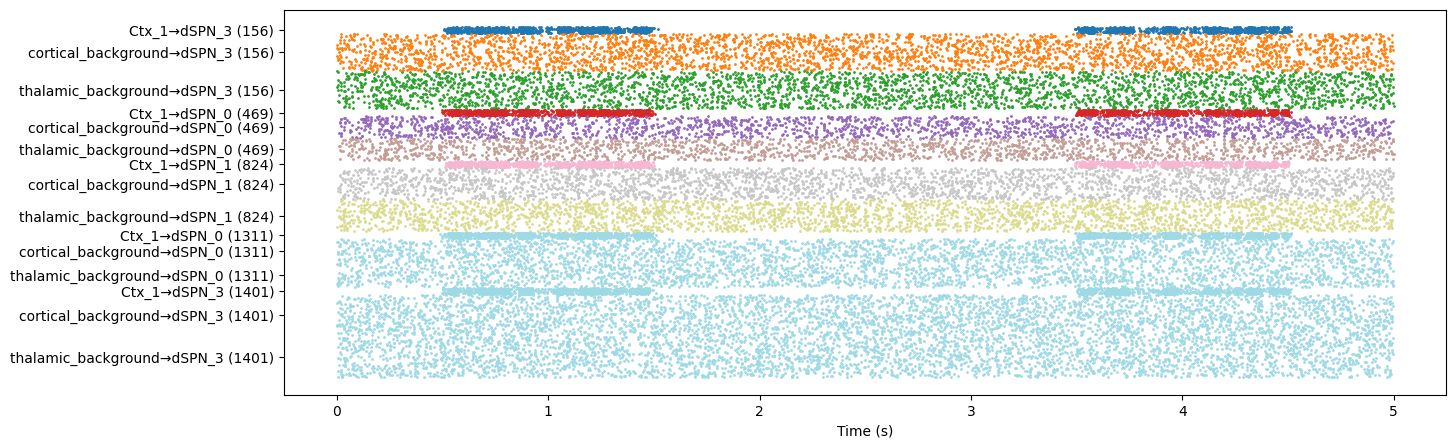

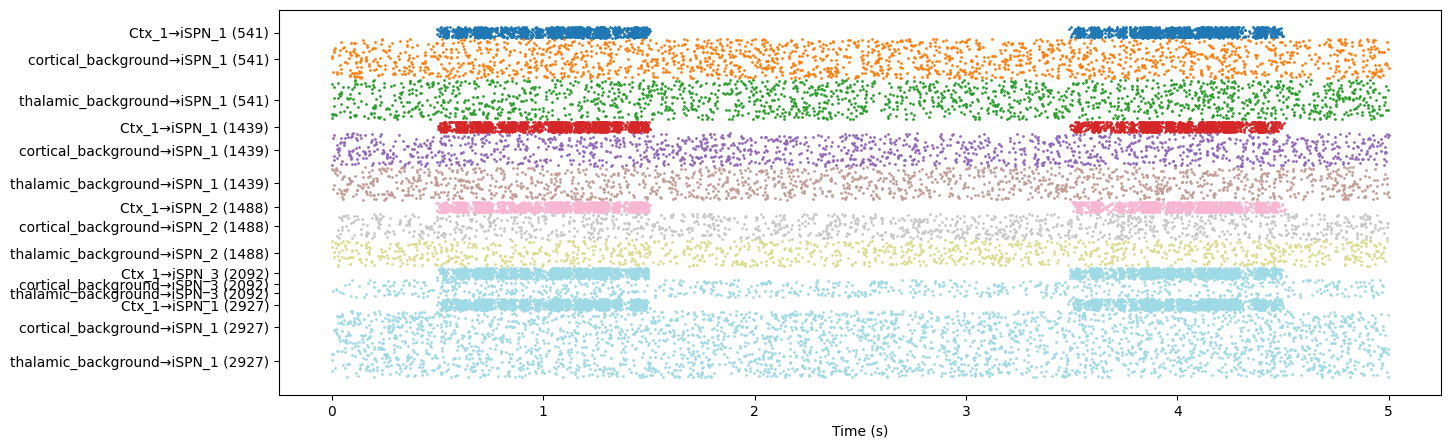

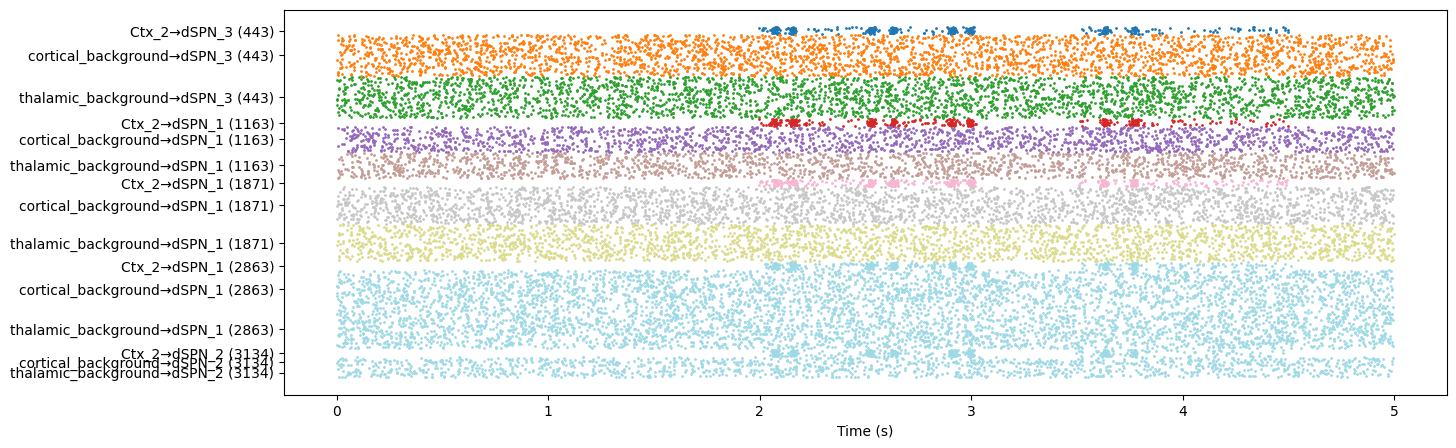

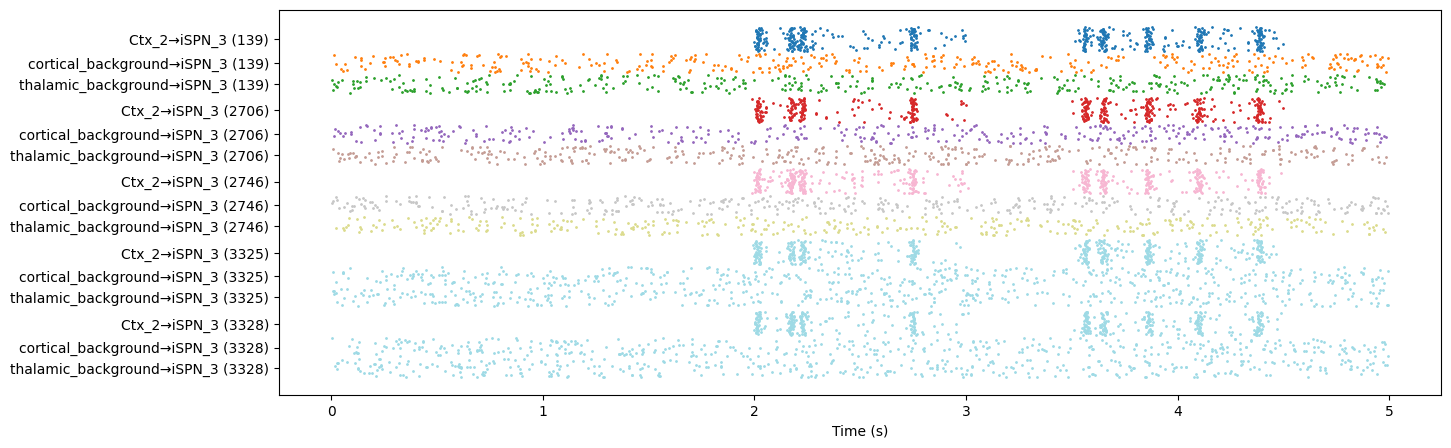

In [14]:
from snudda.plotting import PlotInput
input_file = os.path.join(network_path, "input-spikes.hdf5")
spi = PlotInput(input_file, modified_network_file)
spi.plot_input_population_unit(population_unit_id=1, num_neurons=5, neuron_type="dSPN", fig_size=(15,5))
spi.plot_input_population_unit(population_unit_id=1, num_neurons=5, neuron_type="iSPN", fig_size=(15,5))
spi.plot_input_population_unit(population_unit_id=2, num_neurons=5, neuron_type="dSPN", fig_size=(15,5))
spi.plot_input_population_unit(population_unit_id=2, num_neurons=5, neuron_type="iSPN", fig_size=(15,5))

In [15]:
n_cores=8
os.system(f"mpiexec -n {n_cores} snudda simulate {network_path} --networkFile {modified_network_file} --time {duration}")

args.ipython_profile = None
args.ipython_profile = None
args.ipython_profile = None
args.ipython_profile = None
args.ipython_profile = None
args.ipython_profile = None
args.ipython_profile = None
args.ipython_profile = None
numprocs=8
args: Namespace(action='simulate', path='second_lateral', network_file='second_lateral/network-synapses-virtual.hdf5', input_file=None, output_file=None, time=5.0, snudda_data=None, simulation_config=None, record_volt=True, randomseed=None, neuromodulation=None, disable_synapses=None, disable_gj=None, mech_dir=None, profile=False, verbose=False, exportCoreNeuron=False, record_all=None, ipython_profile=None)
args: Namespace(action='simulate', path='second_lateral', network_file='second_lateral/network-synapses-virtual.hdf5', input_file=None, output_file=None, time=5.0, snudda_data=None, simulation_config=None, record_volt=True, randomseed=None, neuromodulation=None, disable_synapses=None, disable_gj=None, mech_dir=None, profile=False, verbose=False, export

0

Loading second_lateral/simulation/output.hdf5
Failed sanity check on neuron ID, not all neurons simulated? [  64   80  101  139  156  372  443  469  507  522  541  824  853  912
  985  993 1052 1163 1311 1401 1439 1488 1592 1640 1733 1768 1871 2090
 2092 2706 2746 2863 2927 3046 3134 3233 3325 3328 3335 3753]
WARNING. Depolarisation block in neuron - neuron_id: (name, parameter_key, morphology_key):
1592: (dSPN_0, p1863c9a5, mf702205f)
Saving figure to second_lateral/figures/spike-raster.png


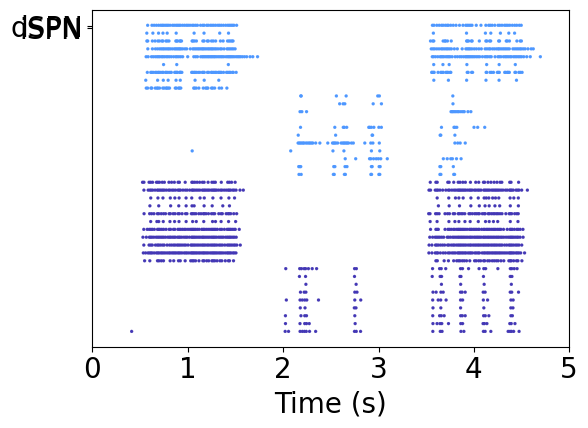

In [16]:
from snudda.plotting import SnuddaPlotSpikeRaster2
fig_file_raster = f"spike-raster.png"

time_range_zoom = (0,duration)
spr = SnuddaPlotSpikeRaster2(network_path=network_path,
                             network_file=modified_network_file)

spr.plot_spike_raster(fig_file=fig_file_raster, time_range=time_range_zoom)

Saving figure second_lateral/figures/spike-frequency-pop-units0-1-2.pdf


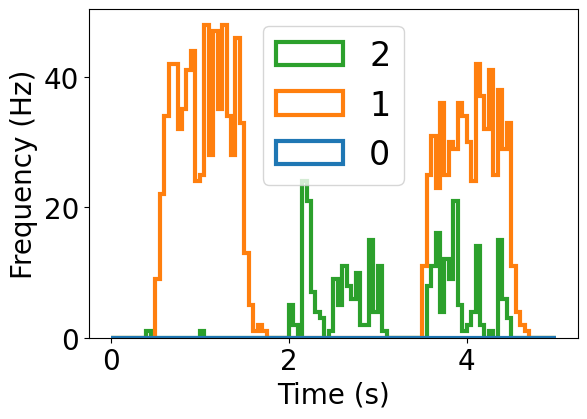

<Axes: xlabel='Time (s)', ylabel='Frequency (Hz)'>

In [17]:
spr.plot_spike_histogram()